In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
gaps = pd.read_csv('new_gapdata.csv')

In [3]:
gaps.head()
# normalized_gap = Gap / UnitsRes

,Unnamed: 0,Unnamed: 0.1,ViolationID,BuildingID,RegistrationID,BoroID,HouseNumber,StreetName,StreetCode,Zip,...,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,Complaints,Violations,Gap,Gap_ratio,normalized_gap
0,0,0,10506902,14,115401,1,1058,1 AVENUE,10010,10022,...,125,132,1929,994719,215676,2,5,-3,-60,-0.024
1,1,1,10506854,14,115401,1,1058,1 AVENUE,10010,10022,...,125,132,1929,994719,215676,2,5,-3,-60,-0.024
2,2,2,10506855,14,115401,1,1058,1 AVENUE,10010,10022,...,125,132,1929,994719,215676,2,5,-3,-60,-0.024
3,3,3,10506853,14,115401,1,1058,1 AVENUE,10010,10022,...,125,132,1929,994719,215676,2,5,-3,-60,-0.024
4,4,4,10604743,14,115401,1,1058,1 AVENUE,10010,10022,...,125,132,1929,994719,215676,2,5,-3,-60,-0.024


In [5]:
gaps.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'ViolationID', u'BuildingID',
       u'RegistrationID', u'BoroID', u'HouseNumber', u'StreetName',
       u'StreetCode', u'Zip', u'Apartment', u'Story', u'Class',
       u'InspectionDate', u'ApprovedDate', u'OriginalCertifyByDate',
       u'OriginalCorrectByDate', u'NewCertifyByDate', u'NewCorrectByDate',
       u'CertifiedDate', u'OrderNumber', u'CurrentStatusID', u'CurrentStatus',
       u'CurrentStatusDate', u'BBL', u'Full_Address', u'Address', u'UnitsRes',
       u'UnitsTotal', u'YearBuilt', u'XCoord', u'YCoord', u'Complaints',
       u'Violations', u'Gap', u'Gap_ratio', u'normalized_gap'],
      dtype='object')

In [6]:
data = gaps[['BuildingID', 'Full_Address', 'normalized_gap','XCoord','YCoord']]
data = data.drop_duplicates()
data = data.replace([np.inf, -np.inf], np.nan) # replace inf with nan
data = data.dropna(subset=['normalized_gap'])
len(data)

5682

In [7]:
data.head()

,BuildingID,Full_Address,normalized_gap,XCoord,YCoord
0,14,"1058 1 AVENUE New York, NY 10022",-0.024000,994719,215676
5,30439,"253 WEST 15 STREET New York, NY 10011",-0.100000,983931,208997
6,6251,"431 AUDUBON AVENUE New York, NY 10033",-0.571429,1003723,249684
31,4885,"766 9 AVENUE New York, NY 10019",-2.625000,987569,217698
56,13774,"152 EAST 46 STREET New York, NY 10017",0.000000,991576,213790


(-4, 4)

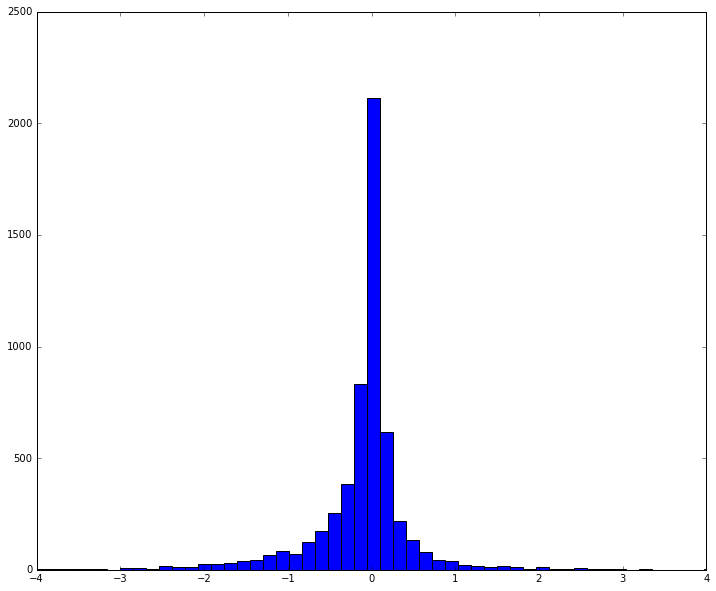

In [8]:
plt.figure(figsize=(12,10))
plt.hist(data['normalized_gap'], bins=500)
plt.xlim(-4,4)

In [9]:
data['normalized_gap'].describe()

count    5682.000000
mean       -0.141305
std         1.304722
min       -34.000000
25%        -0.222222
50%         0.000000
75%         0.071429
max        43.500000
Name: normalized_gap, dtype: float64

In [10]:
top = data[data['normalized_gap'] < np.mean(data['normalized_gap']) 
                                   - 2*(np.std(data['normalized_gap']))
          ]
print len(top), 'buildings identified'
print len(top)*100.00 / len(data) , ' % of all buildings in population studied' 
top.sort(columns=['normalized_gap'], ascending=True)


81 buildings identified
1.42555438226  % of all buildings in population studied


/Users/Faye/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,BuildingID,Full_Address,normalized_gap,XCoord,YCoord
2450,42793,"636 WEST 158 STREET New York, NY 10032",-34.000000,998908,243687
27190,42968,"533 WEST 162 STREET New York, NY 10032",-15.500000,1000565,244140
5387,42827,"538 WEST 159 STREET New York, NY 10032",-12.200000,1000034,243363
32399,7437,"85 BOWERY New York, NY 10002",-12.187500,985554,200434
51951,19175,"168 EAST 108 STREET New York, NY 10029",-10.200000,999566,228204
33296,11966,"444 EAST 13 STREET New York, NY 10009",-9.866667,989383,205139
58902,42119,"404 WEST 147 STREET New York, NY 10031",-9.666667,999616,239984
2069,21308,"54 EDGECOMBE AVENUE New York, NY 10030",-9.000000,999033,237489
13242,1244,"2242 2 AVENUE New York, NY 10029",-9.000000,1001448,229416
41559,7435,"83 BOWERY New York, NY 10002",-8.333333,985545,200410


In [12]:
top.sort(columns=['normalized_gap'], ascending=True).to_csv('top_gap_bldgs_2SD.csv')

/Users/Faye/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
